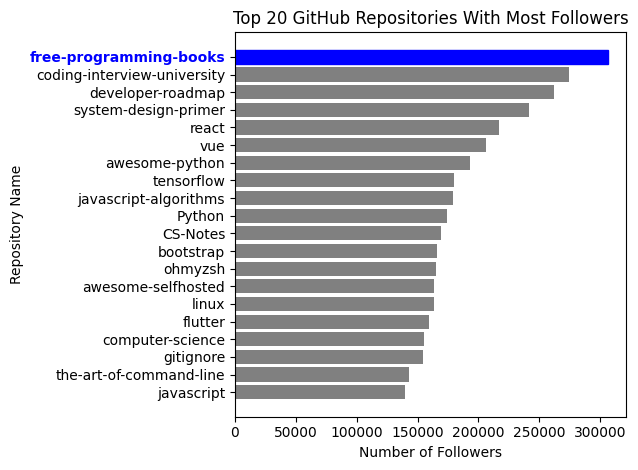

{'incomplete_results': True,
 'items': [{'allow_forking': True,
            'archive_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/{archive_format}{/ref}',
            'archived': False,
            'assignees_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/assignees{/user}',
            'blobs_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/git/blobs{/sha}',
            'branches_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/branches{/branch}',
            'clone_url': 'https://github.com/freeCodeCamp/freeCodeCamp.git',
            'collaborators_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/collaborators{/collaborator}',
            'comments_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/comments{/number}',
            'commits_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/commits{/sha}',
            'compare_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/compare

In [70]:
import requests

import json

import matplotlib.pyplot as plt

from pprint import pprint

from google.colab import userdata

token = userdata.get('class')

# Initialize request parameters
url = 'https://api.github.com/search/repositories?q=followers:>1&sort=followers&per_page=20'
headers = {'Authorization': 'Bearer ' + token}

# Send request to GitHub
response = requests.get(url, headers=headers)

# Check the structure of the response and adjust accordingly
if 'items' in data:
    repos = data['items']

    # Sort repositories by followers_count in ascending order
    repos.sort(key=lambda x: x['stargazers_count'])

    repo_names = [repo['name'] for repo in repos]
    followers_count = [repo['stargazers_count'] for repo in repos]

    # Determine the repository with the most followers
    max_followers_repo = max(repos, key=lambda x: x['stargazers_count'])

    # Color the bars: grey for all repositories, bright blue for the repository with most followers
    colors = ['grey' if repo != max_followers_repo else 'blue' for repo in repos]

    # Plot the data as a horizontal bar graph
    bars = plt.barh(repo_names, followers_count, color=colors)
    plt.xlabel('Number of Followers')
    plt.ylabel('Repository Name')
    plt.title('Top 20 GitHub Repositories With Most Followers')
    plt.tight_layout()

    # Find the bar corresponding to the repository with most followers
    max_followers_bar_index = repo_names.index(max_followers_repo['name'])
    max_followers_bar = bars[max_followers_bar_index]

    # Set the color and weight of the bar and its associated text label
    max_followers_bar.set_color('blue')
    plt.gca().get_yticklabels()[max_followers_bar_index].set_color('blue')
    plt.gca().get_yticklabels()[max_followers_bar_index].set_weight('bold')

    # Show the plot
    plt.show()
else:
    print("Unexpected response format. Check the structure of the response.")

# Check the entire response for inspection
data = response.json()
pprint(data)

